# Import Necessary Libraries

In [64]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.set_option('display.max_columns', None)

# Read Data

In [65]:
df = pd.read_csv("data.csv")

In [66]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


# Data Exploration

In [67]:
df.shape

(1470, 35)

We have 1470 data entries and 35 features in our dataset.

In [68]:
df.isnull().any()

Age                         False
Attrition                   False
BusinessTravel              False
DailyRate                   False
Department                  False
DistanceFromHome            False
Education                   False
EducationField              False
EmployeeCount               False
EmployeeNumber              False
EnvironmentSatisfaction     False
Gender                      False
HourlyRate                  False
JobInvolvement              False
JobLevel                    False
JobRole                     False
JobSatisfaction             False
MaritalStatus               False
MonthlyIncome               False
MonthlyRate                 False
NumCompaniesWorked          False
Over18                      False
OverTime                    False
PercentSalaryHike           False
PerformanceRating           False
RelationshipSatisfaction    False
StandardHours               False
StockOptionLevel            False
TotalWorkingYears           False
TrainingTimesL

No null values found

In [69]:
df.duplicated().any()

False

No duplicate values found

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

All assigned datatypes are correct.

In [71]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [72]:
df.describe(include='O').columns

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')

# Data Pre-processing

In [73]:
# Removing unimportant columns

df.drop(columns=['EmployeeCount', 'EmployeeNumber', 'StandardHours', 'Over18'], axis=1, inplace=True)

# Exploratory Data Analysis

In [74]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2


### Dividing columns based on numerical and categorical type.

In [75]:
print('Total Columns:',len(df.columns))

Total Columns: 31


In [76]:
columns = df.columns.values.tolist()

print('Column: No. of unique values in it')
print(('-----------------------------------------------------'))
print(('-----------------------------------------------------'))

for col in columns:
    print(col,':', df[col].nunique())
    print(('-----------------------------------------------------'))


Column: No. of unique values in it
-----------------------------------------------------
-----------------------------------------------------
Age : 43
-----------------------------------------------------
Attrition : 2
-----------------------------------------------------
BusinessTravel : 3
-----------------------------------------------------
DailyRate : 886
-----------------------------------------------------
Department : 3
-----------------------------------------------------
DistanceFromHome : 29
-----------------------------------------------------
Education : 5
-----------------------------------------------------
EducationField : 6
-----------------------------------------------------
EnvironmentSatisfaction : 4
-----------------------------------------------------
Gender : 2
-----------------------------------------------------
HourlyRate : 71
-----------------------------------------------------
JobInvolvement : 4
-----------------------------------------------------
JobLeve

In [77]:
num_cols = ['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate', 
           'PercentSalaryHike', 'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 
           'YearsWithCurrManager']

cat_cols = ['Attrition','BusinessTravel', 'Department', 'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender', 
            'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'NumCompaniesWorked', 'PerformanceRating', 
            'RelationshipSatisfaction', 'StockOptionLevel', 'TrainingTimesLastYear', 'WorkLifeBalance', 'OverTime']

In [78]:
print('Number of Numerical Columns:', len(num_cols))
print('Number of Categorical Columns:', len(cat_cols))

Number of Numerical Columns: 12
Number of Categorical Columns: 19


### "Attrition" attribute Analysis

Text(0, 0.5, 'Count')

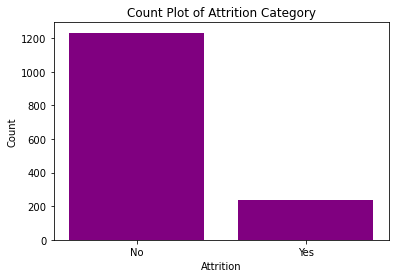

In [79]:
# plt.bar(df['Attrition'].value_counts())
attrition_counts = df['Attrition'].value_counts()
plt.bar(attrition_counts.index, attrition_counts.values, color='purple')

# Add title and labels
plt.title('Count Plot of Attrition Category')
plt.xlabel('Attrition')
plt.ylabel('Count')

In [80]:
attrition_counts, df['Attrition'].value_counts(normalize=True)

(Attrition
 No     1233
 Yes     237
 Name: count, dtype: int64,
 Attrition
 No     0.838776
 Yes    0.161224
 Name: proportion, dtype: float64)

In summary, out of a total of 1,470 employees, 1,233 (approximately 83.88%) stayed with the company, while 237 (approximately 16.12%) left the company.

In [81]:
attrition_df = df[df['Attrition'] == 'Yes']

In [82]:
attrition_df.describe()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000
mean,33.607595,750.362869,10.632911,2.839662,2.464135,65.573840,2.518987,1.637131,2.468354,4787.092827,14559.308017,2.940928,15.097046,3.156118,2.599156,0.527426,8.244726,2.624473,2.658228,5.130802,2.902954,1.945148,2.852321
std,9.689350,401.899519,8.452525,1.008244,1.169791,20.099958,0.773405,0.940594,1.118058,3640.210367,7208.153264,2.678519,3.770294,0.363735,1.125437,0.856361,7.169204,1.254784,0.816453,5.949984,3.174827,3.153077,3.143349
min,18.000000,103.000000,1.000000,1.000000,1.000000,31.000000,1.000000,1.000000,1.000000,1009.000000,2326.000000,0.000000,11.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,408.000000,3.000000,2.000000,1.000000,50.000000,2.000000,1.000000,1.000000,2373.000000,8870.000000,1.000000,12.000000,3.000000,2.000000,0.000000,3.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000
50%,32.000000,699.000000,9.000000,3.000000,3.000000,66.000000,3.000000,1.000000,3.000000,3202.000000,14618.000000,1.000000,14.000000,3.000000,3.000000,0.000000,7.000000,2.000000,3.000000,3.000000,2.000000,1.000000,2.000000
75%,39.000000,1092.000000,17.000000,4.000000,4.000000,84.000000,3.000000,2.000000,3.000000,5916.000000,21081.000000,5.000000,17.000000,3.000000,4.000000,1.000000,10.000000,3.000000,3.000000,7.000000,4.000000,2.000000,5.000000
max,58.000000,1496.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19859.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,15.000000,15.000000,14.000000


## Univariate Analysis

### Numerical Columns

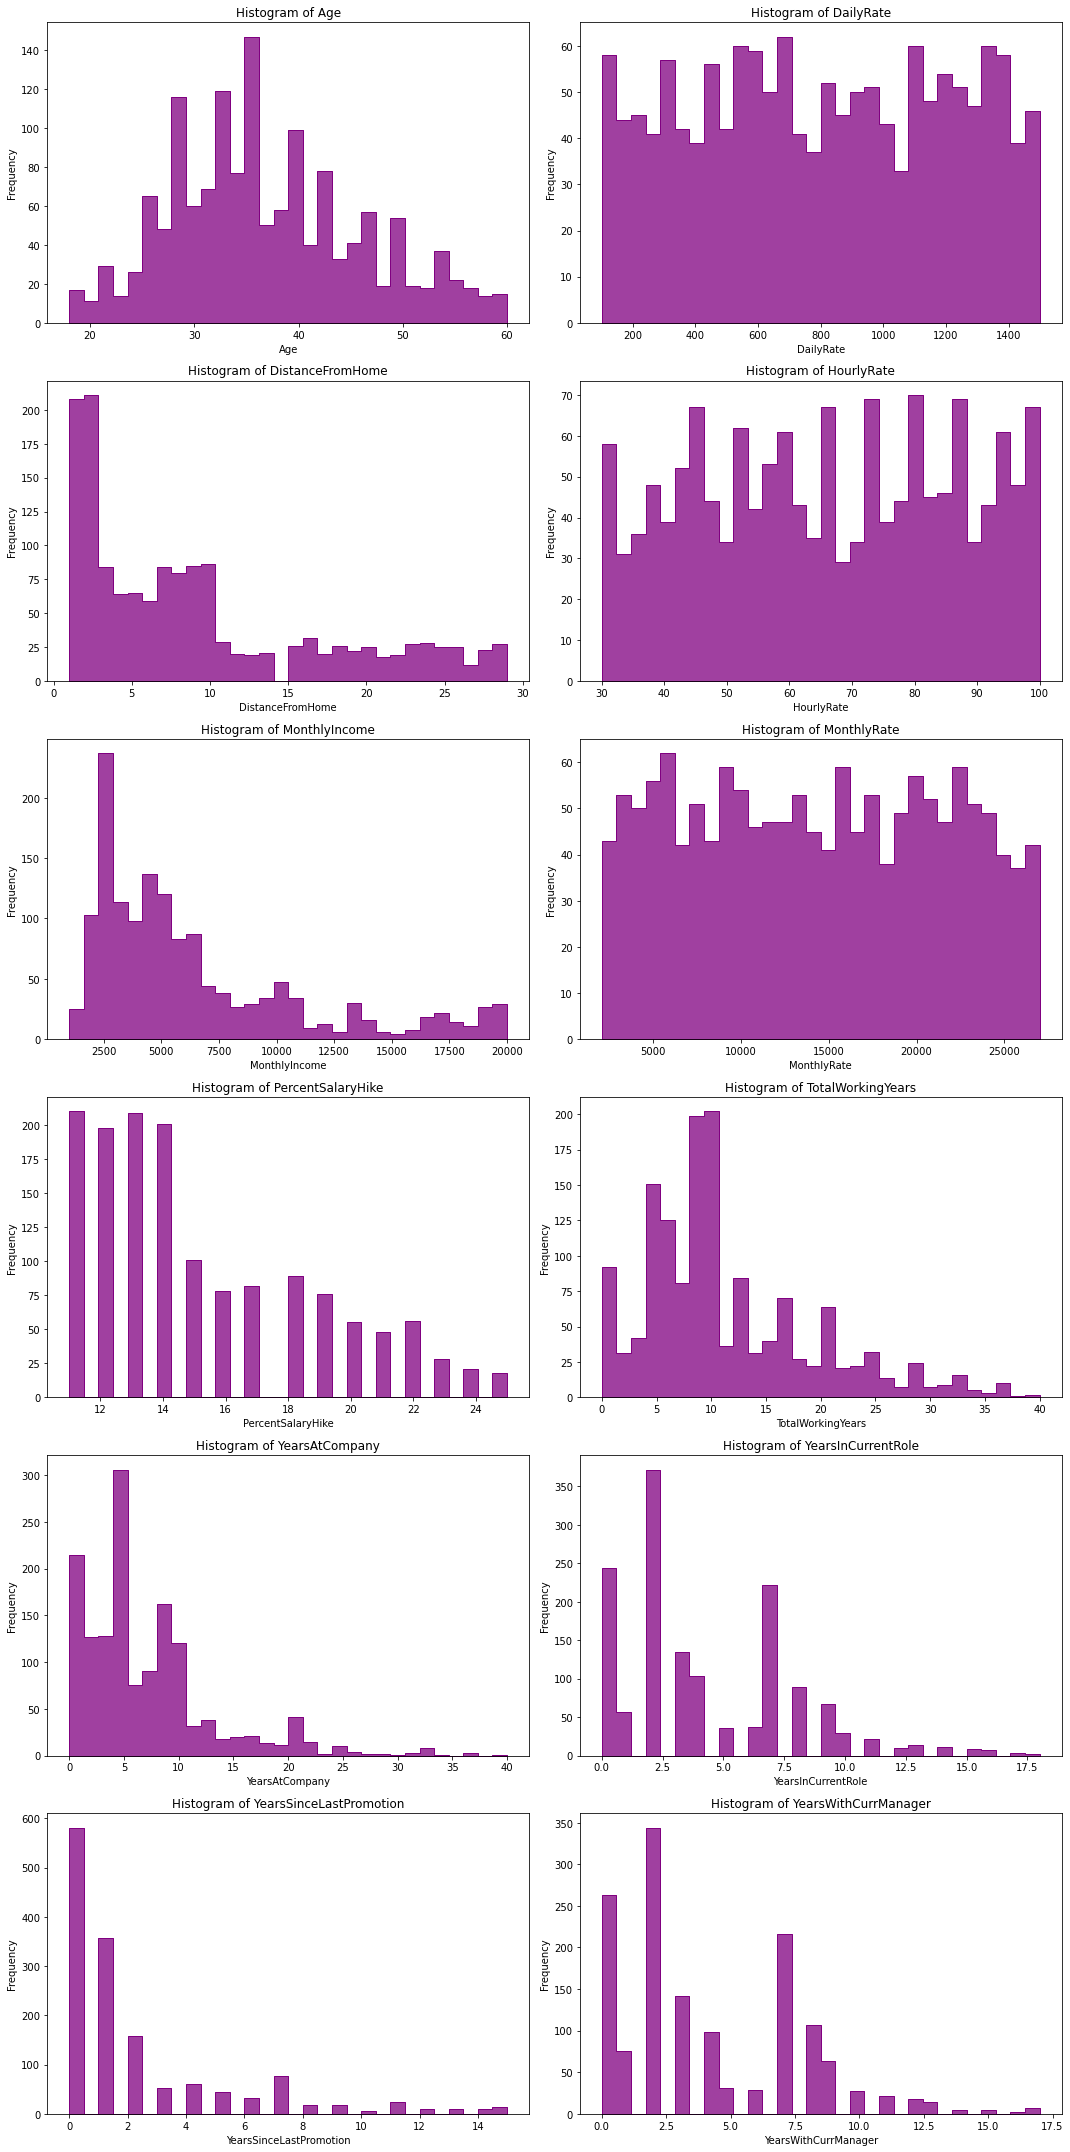

In [83]:
# Create subplots
fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(15, 30))
axes = axes.flatten()

# Plot histograms for each numerical column
for i, col in enumerate(num_cols):
    sns.histplot(data=df, x=col, bins=30, ax=axes[i], element="step", color='purple')
    axes[i].set_title(f'Histogram of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# Hide extra subplots
for j in range(len(num_cols), len(axes)):
    axes[j].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()

### Categorical Columns

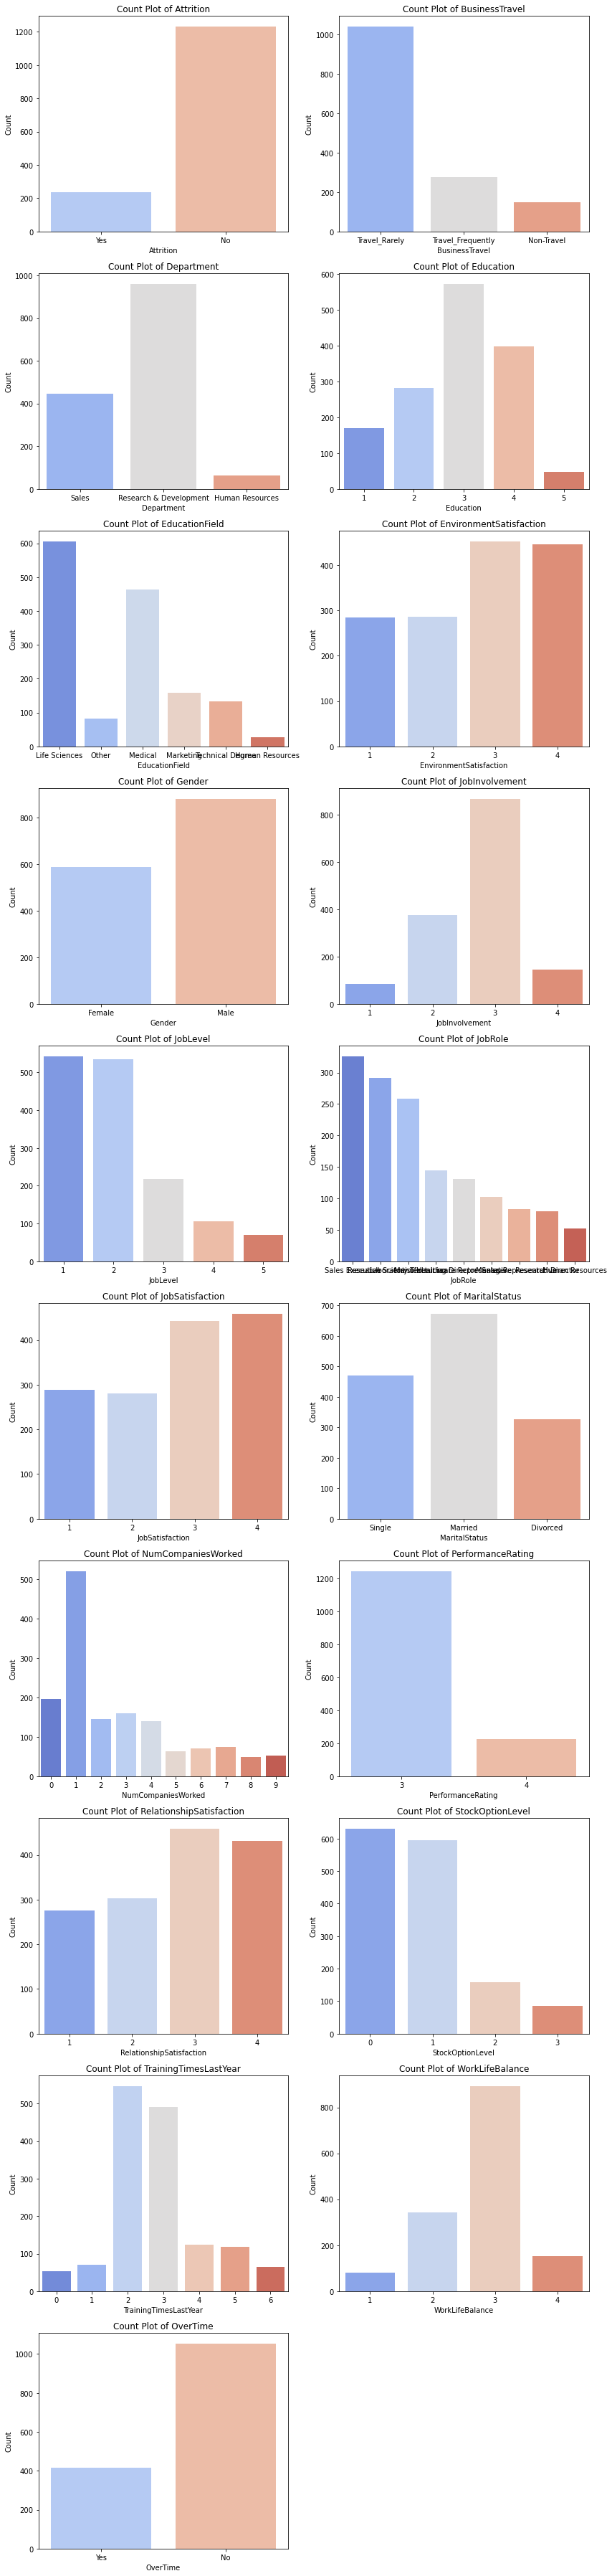

In [84]:
# Create subplots
fig, axes = plt.subplots(nrows=10, ncols=2, figsize=(12,50))
axes = axes.flatten()

# Plot count plots for each categorical column
for i, col in enumerate(cat_cols):
    sns.countplot(data=df, x=col, ax=axes[i], palette='coolwarm')
    axes[i].set_title(f'Count Plot of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

# Hide extra subplots
for j in range(len(cat_cols), len(axes)):
    axes[j].axis('off')

# Adjust layout
plt.tight_layout()

## Bivariate Analysis

In [85]:
# Filter the data based on attrition values
no_attrition = df[df['Attrition'] == 'No']
yes_attrition = df[df['Attrition'] == 'Yes']

### Numerical Columns' Bivariate Analysis

#### Method 1

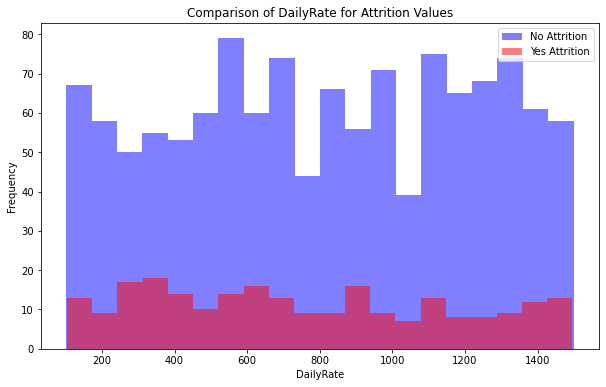

In [86]:
# Plot the histograms
plt.figure(figsize=(10, 6))

plt.hist(no_attrition['DailyRate'], bins=20, alpha=0.5, label='No Attrition', color='blue')
plt.hist(yes_attrition['DailyRate'], bins=20, alpha=0.5, label='Yes Attrition', color='red')

# Add title and labels
plt.title('Comparison of DailyRate for Attrition Values')
plt.xlabel('DailyRate')
plt.ylabel('Frequency')

# Add legend
plt.legend(loc='upper right')

#### Method 2

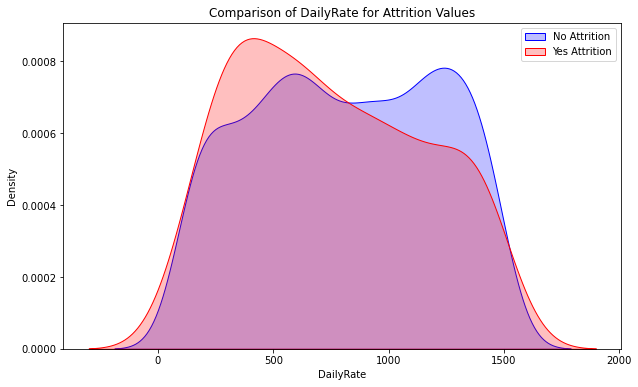

In [87]:
# Filter the data based on attrition values
no_attrition = df[df['Attrition'] == 'No']
yes_attrition = df[df['Attrition'] == 'Yes']

# Plot the KDE plots
plt.figure(figsize=(10, 6))

sns.kdeplot(no_attrition['DailyRate'], shade=True, label='No Attrition', color='blue')
sns.kdeplot(yes_attrition['DailyRate'], shade=True, label='Yes Attrition', color='red')

# Add title and labels
plt.title('Comparison of DailyRate for Attrition Values')
plt.xlabel('DailyRate')
plt.ylabel('Density')

# Add legend
plt.legend(loc='upper right')

#### Method 3

Text(0, 0.5, 'DistanceFromHome')

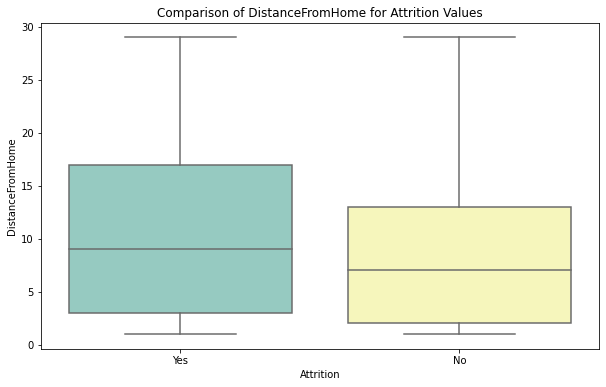

In [88]:
# Plot the box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Attrition', y='DistanceFromHome', data=df, palette="Set3")

# Add title and labels
plt.title('Comparison of DistanceFromHome for Attrition Values')
plt.xlabel('Attrition')
plt.ylabel('DistanceFromHome')

#### Method 2 for all plots

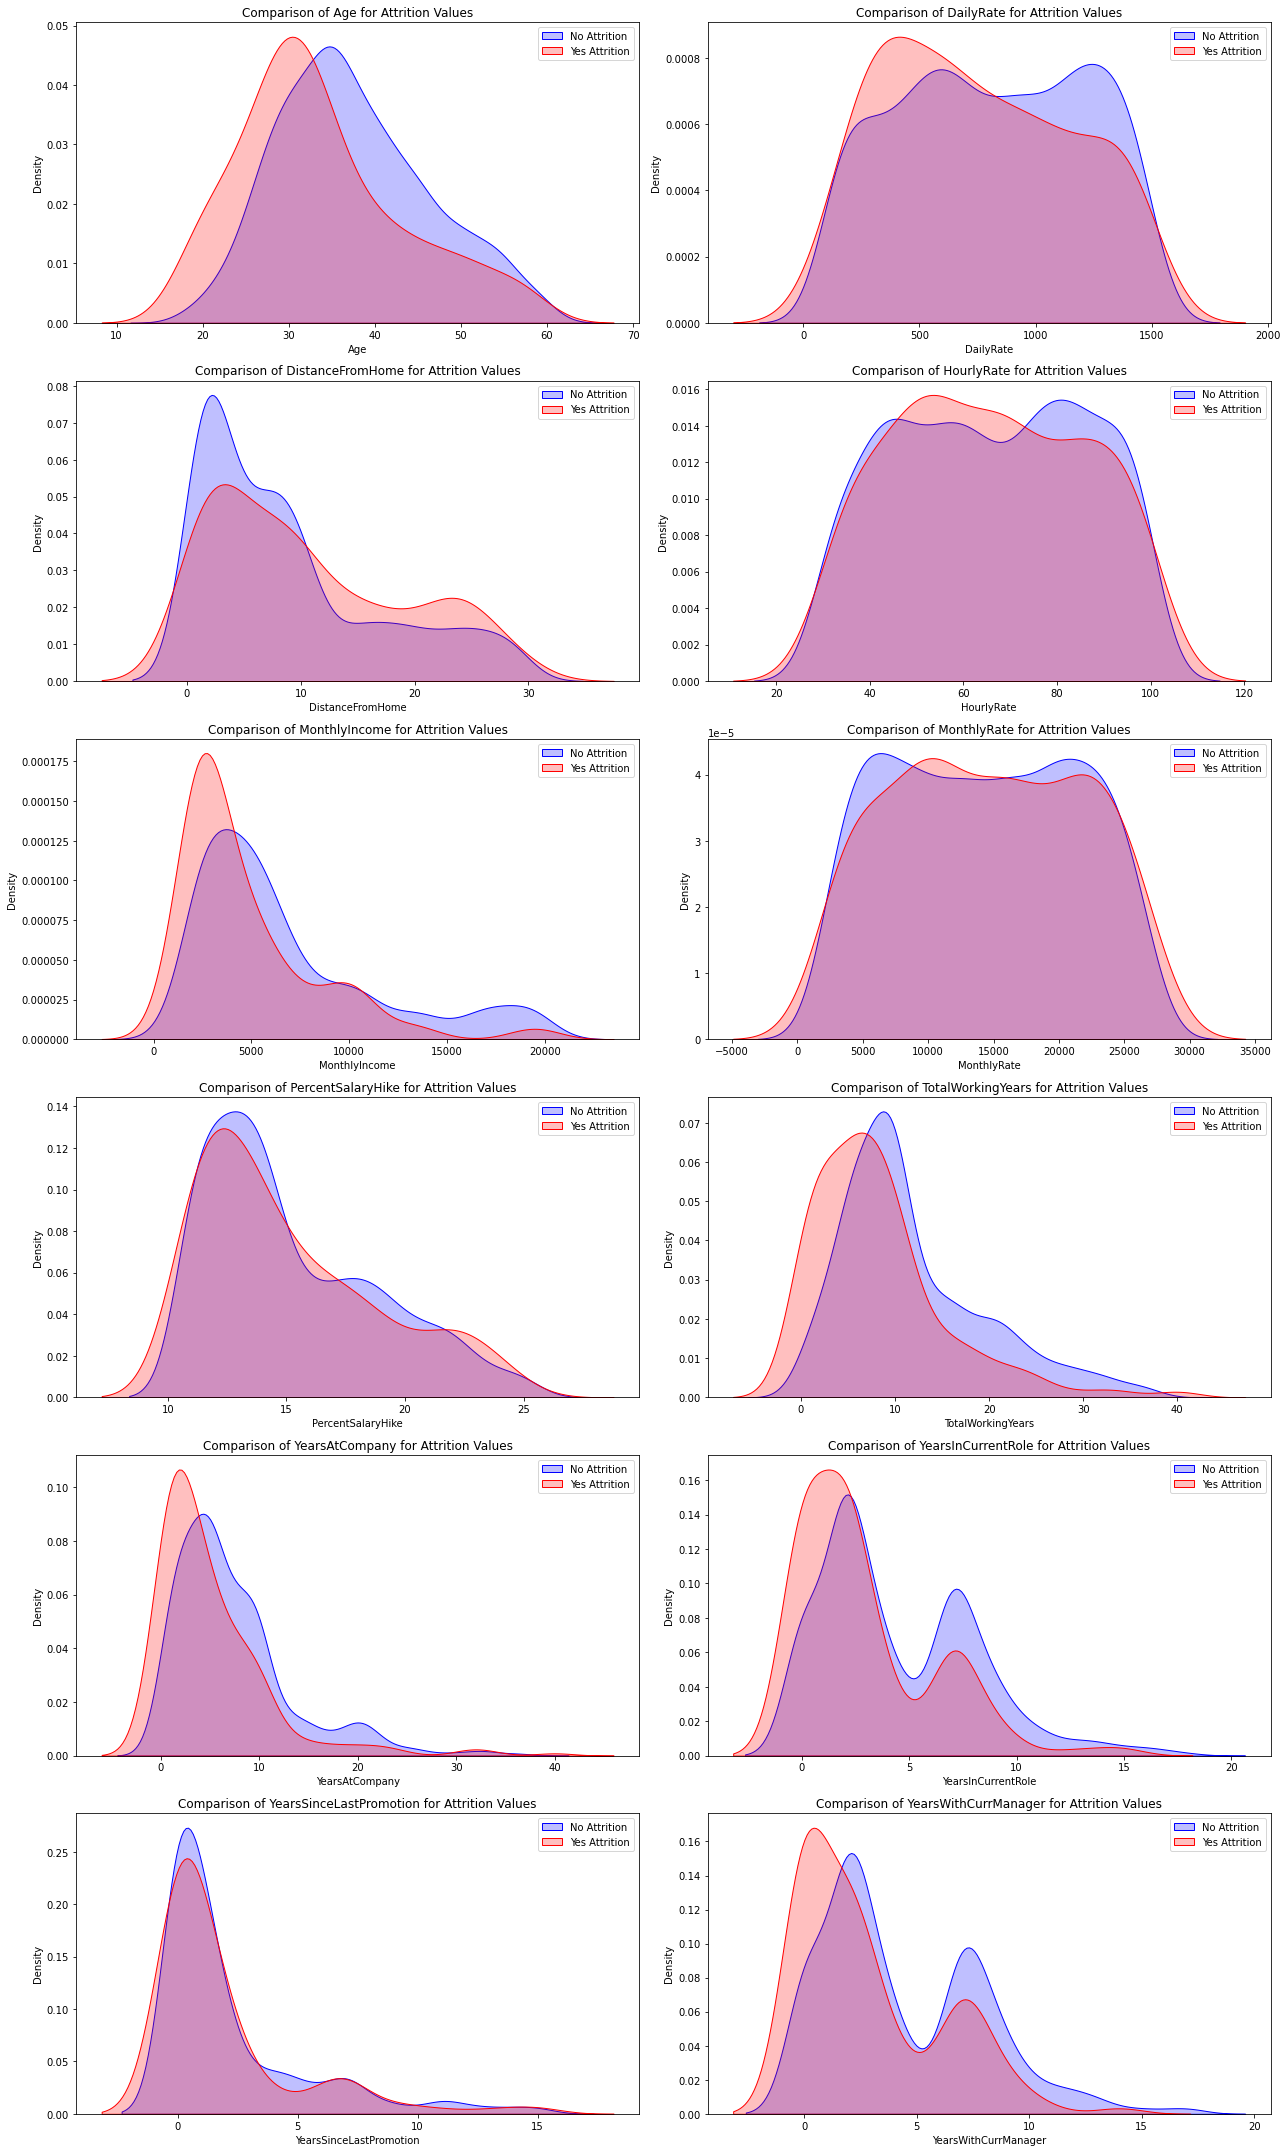

In [89]:
# Create subplots
fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(18, 30))
axes = axes.flatten()

# Plot KDE plots for each numerical column
for i, col in enumerate(num_cols):
    sns.kdeplot(no_attrition[col], shade=True, label='No Attrition', color='blue', ax=axes[i])
    sns.kdeplot(yes_attrition[col], shade=True, label='Yes Attrition', color='red', ax=axes[i])
    axes[i].set_title(f'Comparison of {col} for Attrition Values')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Density')
    axes[i].legend(loc='upper right')

# Hide extra subplots
for j in range(len(num_cols), len(axes)):
    axes[j].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()

#### Pair plots

<Figure size 1440x2160 with 0 Axes>

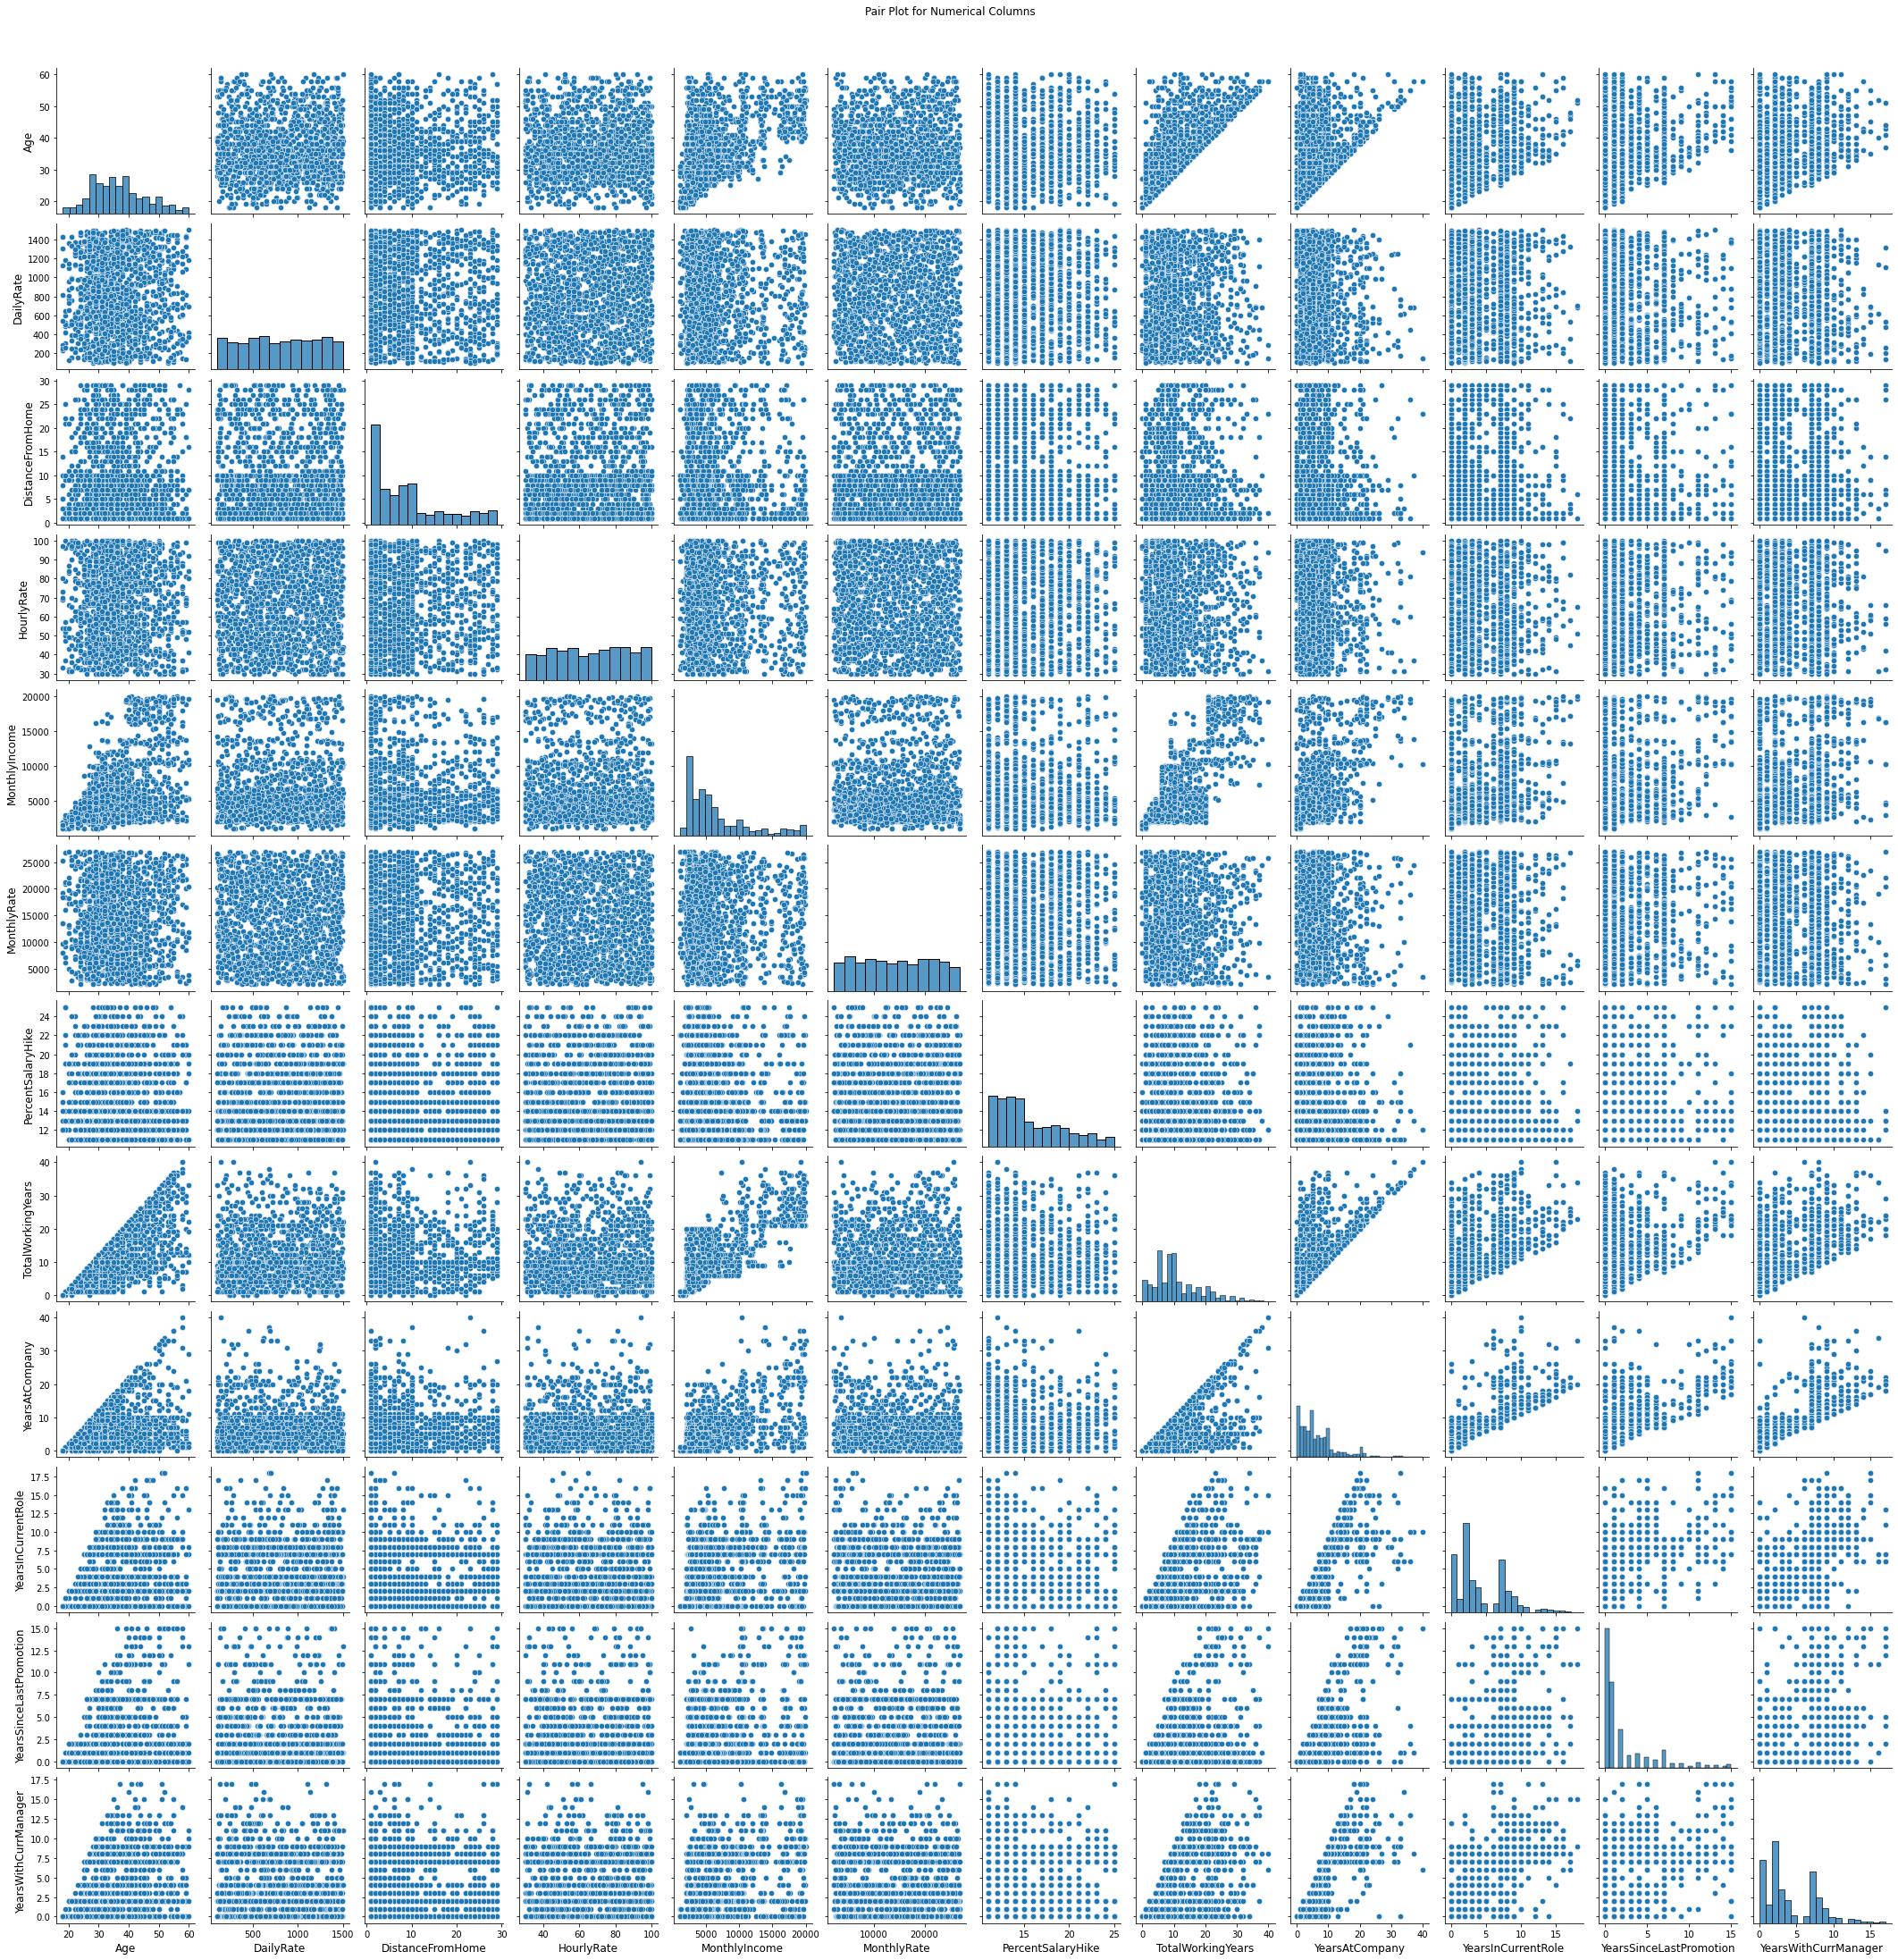

In [90]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the figure size
plt.figure(figsize=(20, 30))

# Create the pair plot for numerical columns with increased label size
pairplot = sns.pairplot(df[num_cols], plot_kws={'s': 40})
pairplot.fig.suptitle('Pair Plot for Numerical Columns', y=1.02)

# Adjust axis label size
for ax in pairplot.axes.flatten():
    ax.set_xlabel(ax.get_xlabel(), fontsize=12)
    ax.set_ylabel(ax.get_ylabel(), fontsize=12)
    ax.tick_params(labelsize=10)

# Show the plot
plt.show()


#### Correlation Heatmap

<AxesSubplot:>

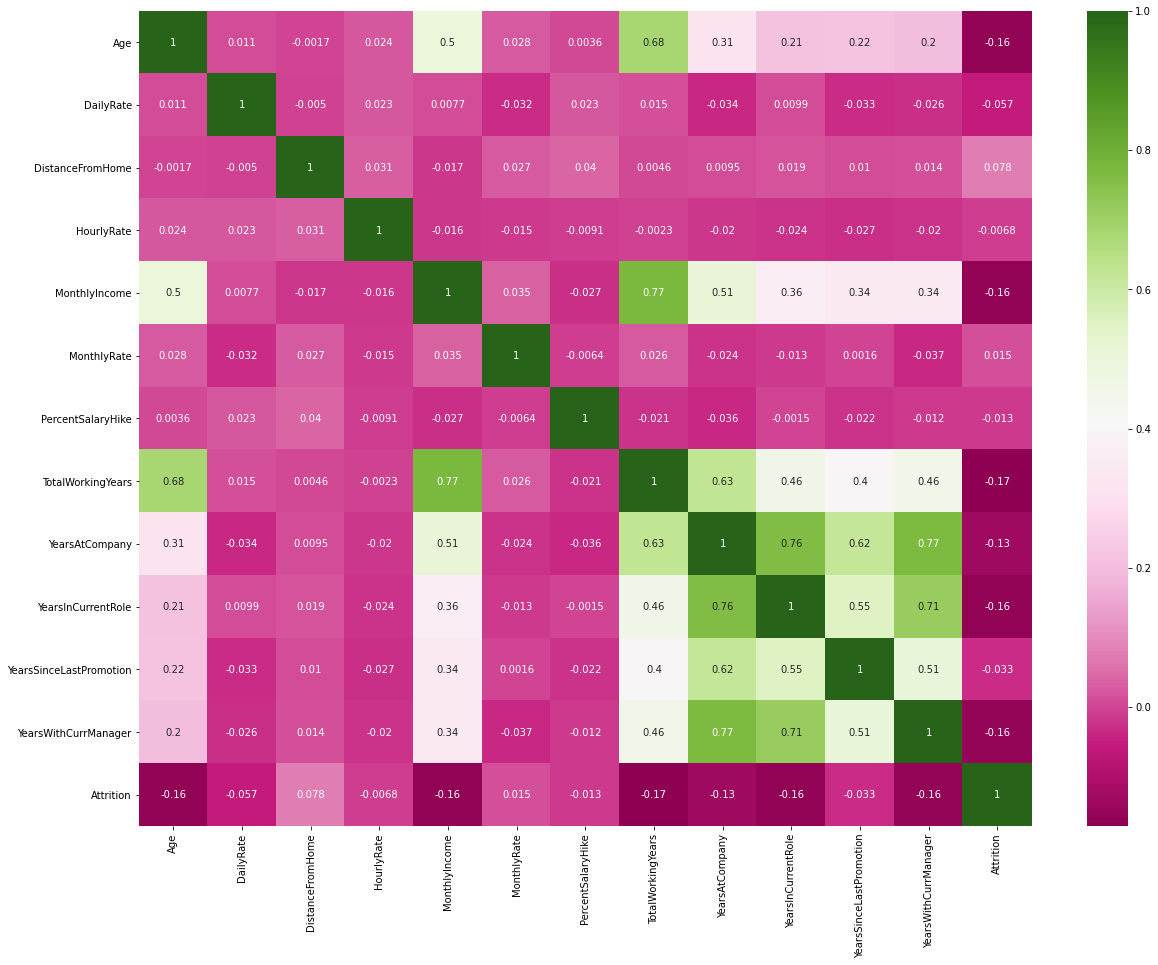

In [91]:
df_t = df.copy()
df_t['Attrition'] = df_t['Attrition'].map({'No':0, 'Yes':1})

df_te = df_t[num_cols].copy()
df_te['Attrition'] = df_t['Attrition']

plt.figure(figsize=(20,15))
sns.heatmap(df_te.corr(), annot=True, cmap="PiYG")

### Categorical columns' Bivariate Analysis

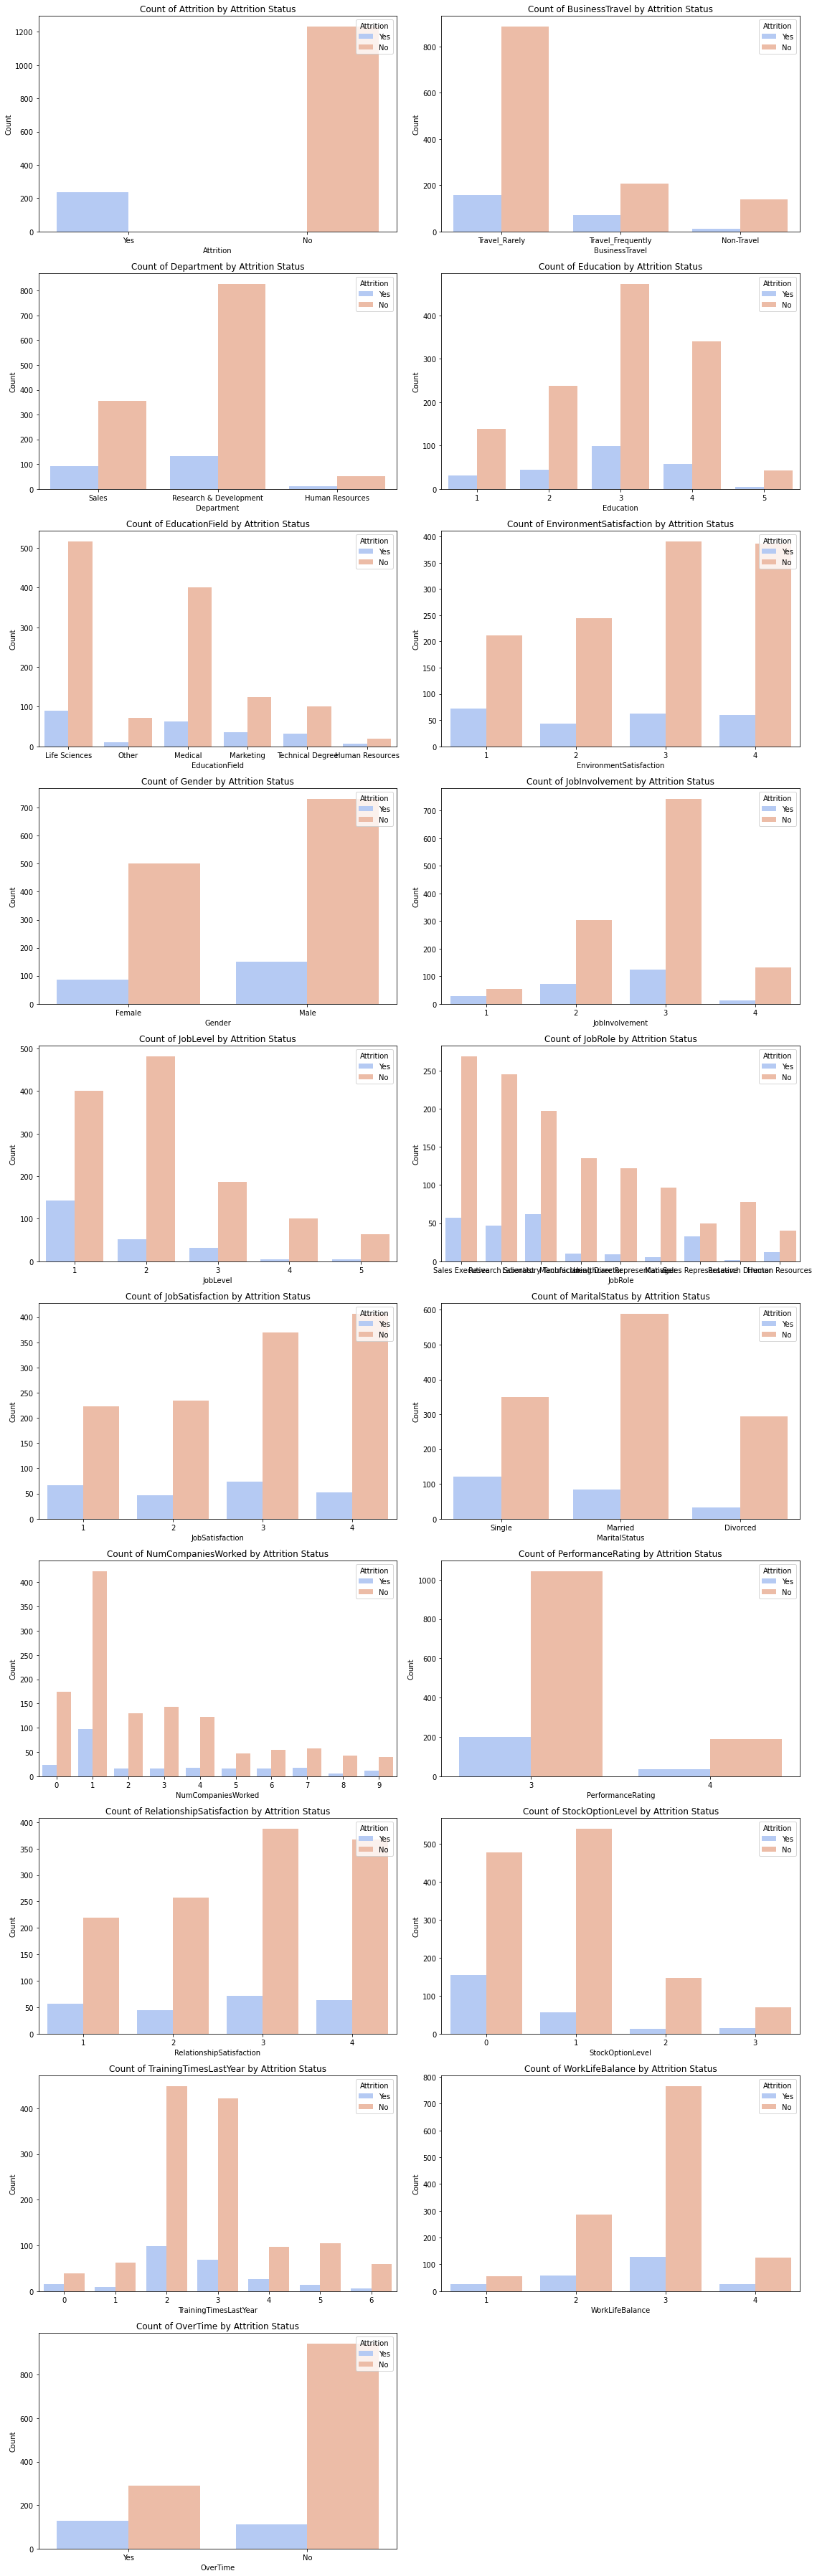

In [92]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create subplots
fig, axes = plt.subplots(nrows=10, ncols=2, figsize=(16, 50))
axes = axes.flatten()

# Plot count plots for each categorical column
for i, col in enumerate(cat_cols):
    sns.countplot(x=col, hue='Attrition', data=df, ax=axes[i], palette='coolwarm')
    axes[i].set_title(f'Count of {col} by Attrition Status')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')
    axes[i].legend(title='Attrition', loc='upper right')

# Hide extra subplots
for j in range(len(cat_cols), len(axes)):
    axes[j].axis('off')
    
# Adjust layout
plt.tight_layout()
plt.show()


In [93]:
from scipy.stats import chi2_contingency

# List to store the results
chi2_results = []

# Iterate over all pairs of categorical columns
for i in range(len(cat_cols)):
    for j in range(i+1, len(cat_cols)):
        col1 = cat_cols[i]
        col2 = cat_cols[j]
        
        # Create a contingency table
        contingency_table = pd.crosstab(df[col1], df[col2])
        
        # Perform the chi-square test
        chi2, p, dof, ex = chi2_contingency(contingency_table)
        
        # Determine if the columns are associated
        associated = 'Yes' if p <= 0.05 else 'No'
        
        # Store the results in the list
        chi2_results.append({
            'Column 1': col1,
            'Column 2': col2,
            'Chi2': chi2,
            'p-value': p,
            'Degrees of Freedom': dof,
            'Associated': associated
        })

# Convert the list of results to a DataFrame
chi2_results_df = pd.DataFrame(chi2_results)

# Display the results
chi2_results_df

,Column 1,Column 2,Chi2,p-value,Degrees of Freedom,Associated
0,Attrition,BusinessTravel,24.182414,0.000006,2,Yes
1,Attrition,Department,10.796007,0.004526,2,Yes
2,Attrition,Education,3.073961,0.545525,4,No
3,Attrition,EducationField,16.024674,0.006774,5,Yes
4,Attrition,EnvironmentSatisfaction,22.503881,0.000051,3,Yes
...,...,...,...,...,...,...
166,StockOptionLevel,WorkLifeBalance,10.554954,0.307451,9,No
167,StockOptionLevel,OverTime,2.938600,0.401189,3,No
168,TrainingTimesLastYear,WorkLifeBalance,5.969094,0.996321,18,No
169,TrainingTimesLastYear,OverTime,20.484170,0.002270,6,Yes


In [94]:
chi2_results_df[(chi2_results_df['Column 1']=='Attrition') & (chi2_results_df['Associated']=='No')]['Column 2']

2                    Education
5                       Gender
12           PerformanceRating
13    RelationshipSatisfaction
Name: Column 2, dtype: object

Above are the columns to remove when creating findal_df to predict 'Attrition' value.

### Categorical and Numerical columns

#### Association between 'All numerical columns' and 'Attrition' Target column.

In [96]:
# import pandas as pd
# import scipy.stats as stats

# def mann_whitney_test(data, categorical_col, numerical_cols):

#     results = []
#     for col in numerical_cols:
#             group1 = data[data[categorical_col] == 0][col]
#             group2 = data[data[categorical_col] == 1][col]
#             stat, p = stats.mannwhitneyu(group1, group2)
#             association = 'Yes' if p <= 0.05 else 'No'
#             results.append({'column': col, 'p_value': p, 'association': association})

#     return pd.DataFrame(results)

# result_df = mann_whitney_test(df, 'Attrition', num_cols)
# result_df.sort_values(by='column')

In [97]:
# result_df[result_df['association']=='No']['column'].tolist()

# Feature Enginnering

### Categorical Encoding

In [98]:
from sklearn.preprocessing import LabelEncoder

cols_to_encode = [col for col in df.columns if df[col].dtype == 'O']

# Create a LabelEncoder object
le = LabelEncoder()

# Apply LabelEncoder to each categorical column
for col in cols_to_encode:
    df[col] = le.fit_transform(df[col])

In [99]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,2,0,94,3,2,7,4,2,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,3,1,61,2,2,6,2,1,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,1,92,2,1,2,3,2,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,4,0,56,3,1,6,3,1,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,1,40,3,1,2,2,1,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2


### Removing the columns having low correleation with 'Attrition' Target Variable.

In [100]:
df_attrition_corr = df.corr()['Attrition'].sort_values()
df_attrition_corr

TotalWorkingYears          -0.171063
JobLevel                   -0.169105
YearsInCurrentRole         -0.160545
MonthlyIncome              -0.159840
Age                        -0.159205
YearsWithCurrManager       -0.156199
StockOptionLevel           -0.137145
YearsAtCompany             -0.134392
JobInvolvement             -0.130016
JobSatisfaction            -0.103481
EnvironmentSatisfaction    -0.103369
WorkLifeBalance            -0.063939
TrainingTimesLastYear      -0.059478
DailyRate                  -0.056652
RelationshipSatisfaction   -0.045872
YearsSinceLastPromotion    -0.033019
Education                  -0.031373
PercentSalaryHike          -0.013478
HourlyRate                 -0.006846
BusinessTravel              0.000074
PerformanceRating           0.002889
MonthlyRate                 0.015170
EducationField              0.026846
Gender                      0.029453
NumCompaniesWorked          0.043494
Department                  0.063991
JobRole                     0.067151
D

In [101]:
((df_attrition_corr > -0.06) & (df_attrition_corr < 0.06)) 

TotalWorkingYears           False
JobLevel                    False
YearsInCurrentRole          False
MonthlyIncome               False
Age                         False
YearsWithCurrManager        False
StockOptionLevel            False
YearsAtCompany              False
JobInvolvement              False
JobSatisfaction             False
EnvironmentSatisfaction     False
WorkLifeBalance             False
TrainingTimesLastYear        True
DailyRate                    True
RelationshipSatisfaction     True
YearsSinceLastPromotion      True
Education                    True
PercentSalaryHike            True
HourlyRate                   True
BusinessTravel               True
PerformanceRating            True
MonthlyRate                  True
EducationField               True
Gender                       True
NumCompaniesWorked           True
Department                  False
JobRole                     False
DistanceFromHome            False
MaritalStatus               False
OverTime      

Based on our analysis using Statistical Testing methods like 'Mann Whitney Test', 'Chi-Square Test' and 'Pearson Correlation Test' the columns we will be removing are,
- TrainingTimesLastYear
- DailyRate
- RelationshipSatisfaction 
- YearsSinceLastPromotion
- Education 
- PercentSalaryHike 
- HourlyRate 
- BusinessTravel
- PerformanceRating 
- MonthlyRate 
- EducationField
- Gender 
- NumCompaniesWorked 

### Creating Final DF

In [102]:
final_df = df.drop(columns = ['TrainingTimesLastYear',
'DailyRate',
'RelationshipSatisfaction',
'YearsSinceLastPromotion',
'Education',
'PercentSalaryHike',
'HourlyRate',
'BusinessTravel',
'PerformanceRating',
'MonthlyRate',
'EducationField',
'Gender',
'NumCompaniesWorked'], axis=1)

# Model Building

### Standardization

In [108]:
# Only standardizing the Numerical columns

from sklearn.preprocessing import StandardScaler

X = final_df.drop('Attrition', axis=1)
y = final_df['Attrition']

for col in num_cols:
    if col not in final_df.columns:
        num_cols.remove(col)
        
scaler = StandardScaler()

# Select numerical columns using boolean indexing
X_scaled = X[num_cols]  # Select numerical columns using boolean indexing

# Fit and transform the scaler on the selected columns (2D array)
X_scaled = scaler.fit_transform(X_scaled)

# Replace the numerical columns in the original DataFrame with scaled data
X[num_cols] = X_scaled

# Now X contains the scaled numerical features and the rest remains unchanged

### Split the dataset into Train and Test

In [109]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size = 0.25, random_state = 12)

print('X_train shape', X_train.shape)
print('y_train shape', y_train.shape)

X_train shape (1102, 17)
y_train shape (1102,)


### *Logistic Regression*

In [110]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

LogisticRegression()

In [111]:
from sklearn.metrics import accuracy_score, classification_report

y_test_pred = lr_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_test_pred)
print("Accuracy:", accuracy)

# Generate classification report
classification_rep = classification_report(y_test, y_test_pred)
print("Classification Report:\n", classification_rep)


Accuracy: 0.8532608695652174
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.97      0.92       309
           1       0.60      0.25      0.36        59

    accuracy                           0.85       368
   macro avg       0.74      0.61      0.64       368
weighted avg       0.83      0.85      0.83       368



class_weight='balanced': This automatically adjusts weights inversely proportional to class frequency. It's a convenient way to handle class imbalance without manual calculations.

### *Random Forest Classifier*

In [113]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')

# Fit the model to the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_test_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_test_pred)
print("Accuracy:", accuracy)
# Generate classification report
classification_rep = classification_report(y_test, y_test_pred)
print("Classification Report:\n", classification_rep)

Accuracy: 0.8559782608695652
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.99      0.92       309
           1       0.75      0.15      0.25        59

    accuracy                           0.86       368
   macro avg       0.80      0.57      0.59       368
weighted avg       0.84      0.86      0.81       368



We can clearly see that both Logistic Regression and Random Forest models are not able to classify minority 'Attrition' category well. Threfore, We will have to deal with the imbalanced data first to effevtively train the model.

# Dealing with Imbalanced Data

In [114]:
final_df['Attrition'].value_counts()

Attrition
0    1233
1     237
Name: count, dtype: int64

## Method 0 - Duplicate the Minority Data (But first separate test data)

#### *Bcz we want to make sure that not a sigle entry from test data is to be present in train data* 

### Standardization and Data Separation

In [115]:
from sklearn.preprocessing import StandardScaler

temp = final_df.copy()

for col in num_cols:
    if col not in temp.columns:
        num_cols.remove(col)
        
scaler = StandardScaler()

# Select numerical columns using boolean indexing
temp_scaled = temp[num_cols]  # Select numerical columns using boolean indexing

# Fit and transform the scaler on the selected columns (2D array)
temp_scaled = scaler.fit_transform(temp_scaled)

# Replace the numerical columns in the original DataFrame with scaled data
temp[num_cols] = temp_scaled

# Now X contains the scaled numerical features and the rest remains unchanged

att_1_test = temp[temp['Attrition']==1].sample(50, replace=True)
att_0_test = temp[temp['Attrition']==0].sample(75, replace=True)
att_test = pd.concat([att_0_test, att_1_test]).reset_index(drop=True)

# Create att_train dataframe from remaining data
att_train = temp[~temp.index.isin(att_test.index)]

print('att_train:', len(att_train))
print('att_test:', len(att_test))

att_train: 1345
att_test: 125


In [119]:
att_train_0 = att_train[att_train['Attrition']==0].sample(1300, replace=True)
att_train_1 = att_train[att_train['Attrition']==1].sample(1300, replace=True)

att_train_new = pd.concat([att_train_0, att_train_1]).reset_index(drop=True)

### Split the dataset into Train and Test

In [120]:
X_train = att_train_new.drop('Attrition', axis=1)
X_test = att_test.drop('Attrition', axis=1)
y_train = att_train_new['Attrition']
y_test = att_test['Attrition']

print('X_train shape', X_train.shape)
print('y_train shape', y_train.shape)
print('X_test shape', X_test.shape)
print('y_test shape', y_test.shape)

X_train shape (2600, 17)
y_train shape (2600,)
X_test shape (125, 17)
y_test shape (125,)


### *Ramdom Forest*

In [121]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')

# Fit the model to the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_test_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_test_pred)
print("Accuracy:", accuracy)
# Generate classification report
classification_rep = classification_report(y_test, y_test_pred)
print("Classification Report:\n", classification_rep)

Accuracy: 0.944
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.97      0.95        75
           1       0.96      0.90      0.93        50

    accuracy                           0.94       125
   macro avg       0.95      0.94      0.94       125
weighted avg       0.94      0.94      0.94       125



### *Logistic Regression*

In [122]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
y_test_pred = lr_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_test_pred)
print("Accuracy:", accuracy)

# Generate classification report
classification_rep = classification_report(y_test, y_test_pred)
print("Classification Report:\n", classification_rep)

Accuracy: 0.752
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.72      0.78        75
           1       0.66      0.80      0.72        50

    accuracy                           0.75       125
   macro avg       0.75      0.76      0.75       125
weighted avg       0.77      0.75      0.75       125



## Method 1 - Duplicate the Minority Data

### Creating a New df

In [126]:
att_0 = final_df[final_df['Attrition']==0].sample(1300, replace=True)
att_1 = final_df[final_df['Attrition']==1].sample(1300, replace=True)

att_new = pd.concat([att_0, att_1]).reset_index(drop=True)
print(att_new.shape)
att_new.head()

(2600, 18)


,Age,Attrition,Department,DistanceFromHome,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,OverTime,StockOptionLevel,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager
0,21,0,1,3,4,2,1,6,3,2,3230,0,0,3,4,3,2,0
1,41,0,1,5,2,4,2,0,2,2,6870,0,0,11,1,3,2,2
2,52,0,2,3,3,2,4,3,1,1,16856,0,0,34,4,34,6,16
3,44,0,1,29,4,3,2,6,4,2,4541,0,0,20,3,20,11,17
4,31,0,2,5,1,3,2,7,3,1,8346,0,1,6,3,5,2,2


### Standardization

In [127]:
from sklearn.preprocessing import StandardScaler

X = att_new.drop('Attrition', axis=1)
y = att_new['Attrition']

for col in num_cols:
    if col not in att_new.columns:
        num_cols.remove(col)
        
scaler = StandardScaler()

# Select numerical columns using boolean indexing
X_scaled = X[num_cols]  # Select numerical columns using boolean indexing

# Fit and transform the scaler on the selected columns (2D array)
X_scaled = scaler.fit_transform(X_scaled)

# Replace the numerical columns in the original DataFrame with scaled data
X[num_cols] = X_scaled

# Now X contains the scaled numerical features and the rest remains unchanged

### Split the dataset into Train and Test

In [128]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size = 0.25, random_state = 12)

print('X_train shape', X_train.shape)
print('y_train shape', y_train.shape)
print('X_test shape', X_test.shape)
print('y_test shape', y_test.shape)

X_train shape (1950, 17)
y_train shape (1950,)
X_test shape (650, 17)
y_test shape (650,)


### *Ramdom Forest*

In [129]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')

# Fit the model to the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_test_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_test_pred)
print("Accuracy:", accuracy)
# Generate classification report
classification_rep = classification_report(y_test, y_test_pred)
print("Classification Report:\n", classification_rep)

Accuracy: 0.9723076923076923
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.94      0.97       325
           1       0.95      1.00      0.97       325

    accuracy                           0.97       650
   macro avg       0.97      0.97      0.97       650
weighted avg       0.97      0.97      0.97       650



#### Ramdom Forest - Hyperparameter Tuning

In [130]:
# from sklearn.model_selection import RandomizedSearchCV
# from sklearn.ensemble import RandomForestClassifier

# # Define hyperparameter grid
# param_dist = {
#     'n_estimators': [100, 200, 300],
#     'max_depth': [None, 5, 10, 15],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'max_features': ['auto', 'sqrt']
# }

# # Create a Random Forest classifier
# rf_classifier = RandomForestClassifier(random_state=42, class_weight='balanced')

# # Create a RandomizedSearchCV object
# random_search = RandomizedSearchCV(estimator=rf_classifier, param_distributions=param_dist, n_iter=100, cv=5, verbose=2, random_state=42, n_jobs=-1)

# # Fit the random search to the data
# random_search.fit(X_train, y_train)

# # Get the best parameters
# best_params = random_search.best_params_
# print(best_params)

# # Create a Random Forest classifier with best parameters
# best_rf_classifier = RandomForestClassifier(**best_params)

# # Fit the model with best parameters
# best_rf_classifier.fit(X_train, y_train)

# # Make predictions on the test data
# y_pred = best_rf_classifier.predict(X_test)

# # Evaluate the model
# accuracy = accuracy_score(y_test, y_pred)
# print("Accuracy:", accuracy)
# print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 100 candidates, totalling 500 fits
{'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 15}
Accuracy: 0.9672727272727273
              precision    recall  f1-score   support

           0       0.97      0.96      0.97       275
           1       0.96      0.97      0.97       275

    accuracy                           0.97       550
   macro avg       0.97      0.97      0.97       550
weighted avg       0.97      0.97      0.97       550

### *Logistic Regression*

In [131]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
y_test_pred = lr_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_test_pred)
print("Accuracy:", accuracy)

# Generate classification report
classification_rep = classification_report(y_test, y_test_pred)
print("Classification Report:\n", classification_rep)

Accuracy: 0.7169230769230769
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.72      0.72       325
           1       0.72      0.71      0.72       325

    accuracy                           0.72       650
   macro avg       0.72      0.72      0.72       650
weighted avg       0.72      0.72      0.72       650



### *XGB Classifier*

In [132]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report

# Create an XGBoost classifier
xgb_model = xgb.XGBClassifier()

# Fit the model to the training data
xgb_model.fit(X_train, y_train)

# Make predictions on the test data
y_test_pred = xgb_model.predict(X_test)

# Evaluate the model
# Calculate accuracy
accuracy = accuracy_score(y_test, y_test_pred)
print("Accuracy:", accuracy)

# Generate classification report
classification_rep = classification_report(y_test, y_test_pred)
print("Classification Report:\n", classification_rep)

Accuracy: 0.9707692307692307
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.94      0.97       325
           1       0.94      1.00      0.97       325

    accuracy                           0.97       650
   macro avg       0.97      0.97      0.97       650
weighted avg       0.97      0.97      0.97       650



### *Gradient Boosting Classifier*

In [133]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create a Gradient Boosting classifier
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Fit the model to the training data
gb_model.fit(X_train, y_train)

# Make predictions on the test data
y_test_pred = gb_model.predict(X_test)

# Evaluate the model
# Calculate accuracy
accuracy = accuracy_score(y_test, y_test_pred)
print("Accuracy:", accuracy)

# Generate classification report
classification_rep = classification_report(y_test, y_test_pred)
print("Classification Report:\n", classification_rep)

Accuracy: 0.8769230769230769
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.85      0.87       325
           1       0.86      0.90      0.88       325

    accuracy                           0.88       650
   macro avg       0.88      0.88      0.88       650
weighted avg       0.88      0.88      0.88       650



### *Decision Tree Classifier*

In [134]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create a Decision Tree classifier
dtc_model = DecisionTreeClassifier(criterion='gini', random_state=42)

# Fit the model to the training data
dtc_model.fit(X_train, y_train)

# Make predictions on the test data
y_test_pred = dtc_model.predict(X_test)

# Evaluate the model
# Calculate accuracy
accuracy = accuracy_score(y_test, y_test_pred)
print("Accuracy:", accuracy)

# Generate classification report
classification_rep = classification_report(y_test, y_test_pred)
print("Classification Report:\n", classification_rep)

Accuracy: 0.9553846153846154
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.91      0.95       325
           1       0.92      1.00      0.96       325

    accuracy                           0.96       650
   macro avg       0.96      0.96      0.96       650
weighted avg       0.96      0.96      0.96       650



### ANN

In [135]:
import tensorflow
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam

# Create the ANN model
model = Sequential()
model.add(Dense(32, activation='relu', kernel_initializer='he_normal', input_dim=X_train.shape[1]))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(8, activation='relu', kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(4, activation='relu', kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
# loss, accuracy = model.evaluate(X_test, y_test)
# print('Test accuracy:', accuracy)

Epoch 1/50
61/61 [==============================] - 2s 9ms/step - loss: 0.8502 - accuracy: 0.5277 - val_loss: 0.7210 - val_accuracy: 0.5292
Epoch 2/50
61/61 [==============================] - 0s 4ms/step - loss: 0.7347 - accuracy: 0.5831 - val_loss: 0.6825 - val_accuracy: 0.5938
Epoch 3/50
61/61 [==============================] - 0s 4ms/step - loss: 0.6895 - accuracy: 0.6195 - val_loss: 0.6678 - val_accuracy: 0.6215
Epoch 4/50
61/61 [==============================] - 0s 4ms/step - loss: 0.6479 - accuracy: 0.6395 - val_loss: 0.6509 - val_accuracy: 0.6523
Epoch 5/50
61/61 [==============================] - 0s 4ms/step - loss: 0.6485 - accuracy: 0.6426 - val_loss: 0.6332 - val_accuracy: 0.6523
Epoch 6/50
61/61 [==============================] - 0s 4ms/step - loss: 0.6146 - accuracy: 0.6718 - val_loss: 0.6139 - val_accuracy: 0.6738
Epoch 7/50
61/61 [==============================] - 0s 5ms/step - loss: 0.6102 - accuracy: 0.6667 - val_loss: 0.5969 - val_accuracy: 0.6877
Epoch 8/50
61/61 [==

#### ANN not performing well because of low amount of data.

## Method 2 - SMOTE AND RandomUnderSampler

In [136]:
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

X = final_df.drop('Attrition', axis=1)
y = final_df['Attrition']

# Print class imbalance before oversampling
print("Class imbalance before oversampling:")
print(Counter(y))

over = SMOTE(k_neighbors=5, sampling_strategy={1:1000})
under = RandomUnderSampler(sampling_strategy={0: 1000})

steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)

# Oversample the data and labels
X_res, y_res = pipeline.fit_resample(X, y)

# Print class imbalance after oversampling
print("Class imbalance after oversampling:")
print(Counter(y_res))

X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, stratify=y_res, test_size=0.25, random_state=42)
X_train.shape

Class imbalance before oversampling:
Counter({0: 1233, 1: 237})
Class imbalance after oversampling:
Counter({0: 1000, 1: 1000})


(1500, 17)

In [137]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

### *Random Forest Classifier*

In [138]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier()

# Fit the model to the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_test_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_test_pred)
print("Accuracy:", accuracy)
# Generate classification report
classification_rep = classification_report(y_test, y_test_pred)
print("Classification Report:\n", classification_rep)

Accuracy: 0.868
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.88      0.87       250
           1       0.87      0.86      0.87       250

    accuracy                           0.87       500
   macro avg       0.87      0.87      0.87       500
weighted avg       0.87      0.87      0.87       500



### *Logistic Regression*

In [139]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

lr_model = LogisticRegression(max_iter=500, C=0.15622907059503569, penalty='l1', solver='liblinear')
lr_model.fit(X_train, y_train)
y_test_pred = lr_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_test_pred)
print("Accuracy:", accuracy)

# Generate classification report
classification_rep = classification_report(y_test, y_test_pred)
print("Classification Report:\n", classification_rep)

Accuracy: 0.808
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.80      0.81       250
           1       0.81      0.81      0.81       250

    accuracy                           0.81       500
   macro avg       0.81      0.81      0.81       500
weighted avg       0.81      0.81      0.81       500



### *XGB Classifier*

In [140]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report

# Create an XGBoost classifier
xgb_model = xgb.XGBClassifier()

# Fit the model to the training data
xgb_model.fit(X_train, y_train)

# Make predictions on the test data
y_test_pred = xgb_model.predict(X_test)

# Evaluate the model
# Calculate accuracy
accuracy = accuracy_score(y_test, y_test_pred)
print("Accuracy:", accuracy)

# Generate classification report
classification_rep = classification_report(y_test, y_test_pred)
print("Classification Report:\n", classification_rep)

Accuracy: 0.78
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.65      0.75       250
           1       0.72      0.91      0.81       250

    accuracy                           0.78       500
   macro avg       0.80      0.78      0.78       500
weighted avg       0.80      0.78      0.78       500



### *Gradient Boosting Classifier*

In [141]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create a Gradient Boosting classifier
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Fit the model to the training data
gb_model.fit(X_train, y_train)

# Make predictions on the test data
y_test_pred = gb_model.predict(X_test)

# Evaluate the model
# Calculate accuracy
accuracy = accuracy_score(y_test, y_test_pred)
print("Accuracy:", accuracy)

# Generate classification report
classification_rep = classification_report(y_test, y_test_pred)
print("Classification Report:\n", classification_rep)

Accuracy: 0.858
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.88      0.86       250
           1       0.88      0.83      0.85       250

    accuracy                           0.86       500
   macro avg       0.86      0.86      0.86       500
weighted avg       0.86      0.86      0.86       500



### *Decision Tree Classifier*

In [142]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create a Decision Tree classifier
dtc_model = DecisionTreeClassifier(criterion='gini', random_state=42)

# Fit the model to the training data
dtc_model.fit(X_train, y_train)

# Make predictions on the test data
y_test_pred = dtc_model.predict(X_test)

# Evaluate the model
# Calculate accuracy
accuracy = accuracy_score(y_test, y_test_pred)
print("Accuracy:", accuracy)

# Generate classification report
classification_rep = classification_report(y_test, y_test_pred)
print("Classification Report:\n", classification_rep)

Accuracy: 0.752
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.76      0.75       250
           1       0.76      0.74      0.75       250

    accuracy                           0.75       500
   macro avg       0.75      0.75      0.75       500
weighted avg       0.75      0.75      0.75       500

